### Phần 1: Giả lập dữ liệu (NumPy)

In [5]:
import numpy as np

# Đặt seed để kết quả có thể tái lập
np.random.seed(42)

# Số lượng cửa hàng
n_samples = 1000

# Giả lập chi phí quảng cáo
ad_spend = np.random.uniform(0, 120, n_samples)

# Noise ngẫu nhiên
noise = np.random.normal(0, 20, n_samples)

# Công thức doanh thu
revenue = 2.2 * ad_spend + 7 + noise


### Phần 2: Cấu trúc và xử lý dữ liệu (Pandas)

In [6]:
import pandas as pd

# Tạo DataFrame
df = pd.DataFrame({
    'Ad Spend': ad_spend,
    'Revenue': revenue
})

# Thêm cột Performance
df['Performance'] = np.where(df['Revenue'] > 200, 'High', 'Low')

# Loại bỏ outliers: Revenue < 0 hoặc Revenue > 500
df_cleaned = df[(df['Revenue'] >= 0) & (df['Revenue'] <= 500)]

# In 5 dòng đầu tiên sau khi làm sạch
df_cleaned.head()


,Ad Spend,Revenue,Performance
0,44.944814,109.432611,Low
1,114.085717,231.281690,High
2,87.839273,207.850358,High
3,71.839018,177.257555,Low
4,18.722237,59.384730,Low


### Phần 3: Trực quan hóa (Matplotlib)

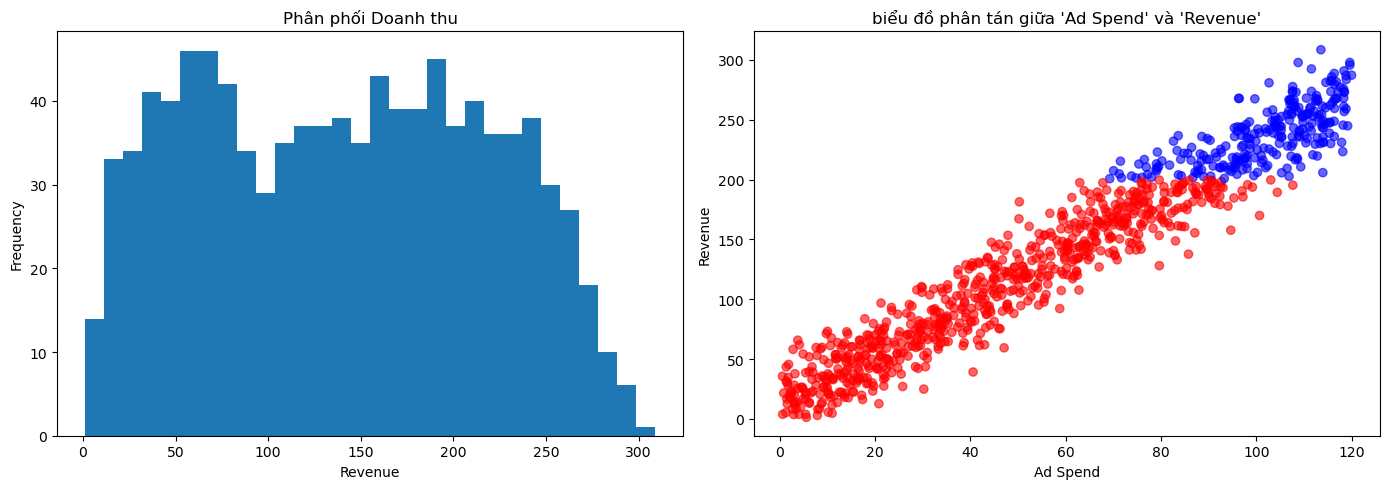

In [7]:
import matplotlib.pyplot as plt

# Tạo figure với 2 subplot (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ===== Biểu đồ 1: Histogram =====
axes[0].hist(df_cleaned['Revenue'], bins=30)
axes[0].set_title('Phân phối Doanh thu')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# ===== Biểu đồ 2: Scatter Plot =====
colors = df_cleaned['Performance'].map({'High': 'blue', 'Low': 'red'})

axes[1].scatter(
    df_cleaned['Ad Spend'],
    df_cleaned['Revenue'],
    c=colors,
    alpha=0.6
)

axes[1].set_title("biểu đồ phân tán giữa 'Ad Spend' và 'Revenue'")
axes[1].set_xlabel('Ad Spend')
axes[1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()
